<a href="https://colab.research.google.com/github/Haya-AlKorki/Arabic_WhatsApp_Sentiment_Analysis-/blob/main/Arabic_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [ ]:
# reading our dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Colab_Notebooks/WhatsApp_Dataset.txt'
f = open(path,'r',encoding='utf-8') # r means just for reading in python, utf-8 (an encoding system for Unicode) is used for supporting many languages and can accommodate pages and forms in any mixture of those languages.
data = f.read()
#print(type(data)) # the type of our data is string
#print(data)

Mounted at /content/drive


In [ ]:
 #extracting informations from the data we have
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\s[AaPp][Mm]'
dates = re.findall(pattern,data)
messages = re.split(pattern,data)[1:]

In [ ]:
df = pd.DataFrame({'message': messages , 'Date': dates})
# convert to date type
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%y, %H:%M:%S %p')

# removing the square brackets in messages
df['message']= df['message'].str.replace(']','')
df['message']= df['message'].str.replace('[','')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,message,Date
0,(صف عاشر ٥)المدرسةالوطنية: ‎Messages and call...,2021-05-17 09:32:07
1,‪+965 9971 3440‬: ‎video omitted\n‎,2021-05-18 07:34:27
2,‪+965 6558 5782‬: ‎sticker omitted\n,2021-05-18 07:40:37
3,‪+965 9788 9035‬: قاطع؛ لأن المقاطعة مقاومة \...,2021-05-18 09:11:22
4,‪+965 9788 9035‬: ‎image omitted\n‎,2021-05-18 09:36:54


In [ ]:
users = []
messages = []
for message in df['message']:
  entry = re. split(' ([\w\W]+?):\s', message)
  if entry[1:]: # user name
    users.append(entry[1])
    messages. append(entry[2])
  else:
    users. append('group_notification')
    messages.append(entry[0])

df['User'] = users
df['Message'] = messages
df. drop(columns=['message'], inplace=True)

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second
df.head(50)

,Date,User,Message,Year,Month,Day,Hour,Minute,Second
0,2021-05-17 09:32:07,(صف عاشر ٥)المدرسةالوطنية,‎Messages and calls are end-to-end encrypted. ...,2021,May,17,9,32,7
1,2021-05-18 07:34:27,‪+965 9971 3440‬,‎video omitted\n‎,2021,May,18,7,34,27
2,2021-05-18 07:40:37,‪+965 6558 5782‬,‎sticker omitted\n,2021,May,18,7,40,37
3,2021-05-18 09:11:22,‪+965 9788 9035‬,قاطع؛ لأن المقاطعة مقاومة \nلا تساهم في ثمن رص...,2021,May,18,9,11,22
4,2021-05-18 09:36:54,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,54
5,2021-05-18 09:36:54,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,54
6,2021-05-18 09:36:54,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,54
7,2021-05-18 09:36:55,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,55
8,2021-05-18 09:36:55,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,55
9,2021-05-18 09:36:55,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,55


In [ ]:
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'
LAM = u'\u0644'
ALEF = u'\u0627'
HAMZA = u'\u0621'
TATWEEL = u'\u0640'
TEH_MARBUTA = u'\u0629'
HEH = u'\u0647'
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
HAMZA_ABOVE = u'\u0654'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
YEH_HAMZA = u'\u0626'
HAMZA_BELOW = u'\u0655'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'

HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN, FATHA, DAMMA, KASRA, SUKUN,SHADDA])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,LAM_ALEF_HAMZA_ABOVE,LAM_ALEF_HAMZA_BELOW, LAM_ALEF_MADDA_ABOVE])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,ALEF_HAMZA_BELOW, HAMZA_ABOVE,HAMZA_BELOW])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")

def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())

def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)

def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)

def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)

def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)

def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text

In [ ]:
def nd(x):
  x['Normalized_Text'] = normalize_arabic_text(x['Message'])
  return x
df = df.apply(nd, axis=1)

In [ ]:
df.head(20)

,Date,User,Message,Year,Month,Day,Hour,Minute,Second,Normalized_Text
0,2021-05-17 09:32:07,(صف عاشر ٥)المدرسةالوطنية,‎Messages and calls are end-to-end encrypted. ...,2021,May,17,9,32,7,
1,2021-05-18 07:34:27,‪+965 9971 3440‬,‎video omitted\n‎,2021,May,18,7,34,27,
2,2021-05-18 07:40:37,‪+965 6558 5782‬,‎sticker omitted\n,2021,May,18,7,40,37,
3,2021-05-18 09:11:22,‪+965 9788 9035‬,قاطع؛ لأن المقاطعة مقاومة \nلا تساهم في ثمن رص...,2021,May,18,9,11,22,قاطع لان المقاطعه مقاومه لا تساهم في ثمن رصاصتهم
4,2021-05-18 09:36:54,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,54,
5,2021-05-18 09:36:54,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,54,
6,2021-05-18 09:36:54,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,54,
7,2021-05-18 09:36:55,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,55,
8,2021-05-18 09:36:55,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,55,
9,2021-05-18 09:36:55,‪+965 9788 9035‬,‎image omitted\n‎,2021,May,18,9,36,55,


In [ ]:
df = df[df['Normalized_Text'] != ''].reset_index(drop=True)
df.head(20)

,Date,User,Message,Year,Month,Day,Hour,Minute,Second,Normalized_Text
0,2021-05-18 09:11:22,‪+965 9788 9035‬,قاطع؛ لأن المقاطعة مقاومة \nلا تساهم في ثمن رص...,2021,May,18,9,11,22,قاطع لان المقاطعه مقاومه لا تساهم في ثمن رصاصتهم
1,2021-05-18 10:04:48,‪+965 9971 3440‬,هادي بالاردن المنتجات البديلة\n,2021,May,18,10,4,48,هادي بالاردن المنتجات البديله
2,2021-05-18 12:31:48,‪+965 9970 5536‬,لو سمحتو. هو استاذ العربي طلب منهم يكتبو عن ال...,2021,May,18,12,31,48,لو سمحتو هو استاذ العربي طلب منهم يكتبو عن الخ...
3,2021-05-18 01:23:36,‪+965 9970 5536‬,ماحد بعرف\n,2021,May,18,1,23,36,ماحد بعرف
4,2021-05-18 01:53:49,‪+965 6042 9021‬,السلام عليكم\n,2021,May,18,1,53,49,السلام عليكم
5,2021-05-18 01:54:14,‪+965 6042 9021‬,لو سمحتو اذا بتعرفو مختبر تحاليل كويس واسعاره ...,2021,May,18,1,54,14,لو سمحتو اذا بتعرفو مختبر تحاليل كويس واسعاره ...
6,2021-05-18 04:13:49,‪+965 508 55490‬,مركز مترو السالمية\nومركز ضمان الصحي حولي\n‎,2021,May,18,4,13,49,مركز مترو السالميه ومركز ضمان الصحي حولي
7,2021-05-18 06:38:05,‪+965 9970 5536‬,شكرا عشان جاوبتو\n‎,2021,May,18,6,38,5,شكرا عشان جاوبتو
8,2021-05-18 06:40:10,‪+965 9971 3440‬,عادي يا قلبي. الصبر. اه تكتبي عنهم وتقرير كم...,2021,May,18,6,40,10,عادي يا قلبي الصبر اه تكتبي عنهم وتقرير كمان ع...
9,2021-05-18 06:40:52,‪+965 9971 3440‬,معلش. ممكن الناس مشغوله او مو منتبهه. او مو مر...,2021,May,18,6,40,52,معلش ممكن الناس مشغوله او مو منتبهه او مو مركز...


In [ ]:
df = df.drop_duplicates('Normalized_Text').reset_index(drop=True)


In [ ]:
df.shape

(1841, 10)

In [ ]:
Train_Data_Extended_File = "train_all.csv"
df2 = pd.DataFrame()
df2 = pd.read_csv(Train_Data_Extended_File, sep=",")

In [ ]:
df2.head()

,Tweet_id,sentiment,Text
0,1221884257490042887,neutral,الزعل بيغير ملامحك بيغير نظرة العين بيغير شك...
1,1221884400377499651,neutral,@halgawi @DmfMohe ليس حباً في ايران بقدر ماهو ...
2,1221881406168731649,neutral,@adalfahadduwail أبي أعرف الحاكم العربي المسلم...
3,1221882047691657217,neutral,@sarmadbouchamou @DimaSadek في الخطاب تبع سليم...
4,1221880371773673474,neutral,@FofaMahmouddd مفيش الكلام ده في الزمن


In [ ]:
pickle.dump(df2, open('train_data.pkl', 'wb'))
train_data = pickle.load(open('train_data.pkl', 'rb'))

In [ ]:
df2 = df2.drop(['Tweet_id'], axis=1)

In [ ]:
df2['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
def nd(x):
  x['text'] = normalize_arabic_text(x['Text'])
  return x
df2 = df2.apply(nd, axis=1)

In [ ]:
df2 = df2[df2['text'] != ''].reset_index(drop=True)
df2 = df2.drop(['Text'], axis=1)
df2.head(20)

,sentiment,text
0,neutral,الزعل بيغير ملامحك بيغير نظره العين بيغير شكلك...
1,neutral,ليس حبا في ايران بقدر ماهو نكايه بترامب وحزبه
2,neutral,ابي اعرف الحاكم العربي المسلم اشلون ينام مايخا...
3,neutral,في الخطاب تبع سليم سعاده حطت عالتويتر شو قال ق...
4,neutral,مفيش الكلام ده في الزمن
5,neutral,عندي مشكله لما تبي اجدد اقامه عامل حاولت اتواص...
6,neutral,الرءاسه الفلسطينيه تدعو السفراء العرب والمسلمي...
7,neutral,التجنيس يضر اهل السنه في سوريا تتغير التركيبه ...
8,neutral,سوف تبحث عني في شخص اخر
9,neutral,كل ما املكه في تلك الحياه هو كرامتي وكلمتي ولن...


0        الزعل بيغير ملامحك بيغير نظره العين بيغير شكلك...
1            ليس حبا في ايران بقدر ماهو نكايه بترامب وحزبه
2        ابي اعرف الحاكم العربي المسلم اشلون ينام مايخا...
3        في الخطاب تبع سليم سعاده حطت عالتويتر شو قال ق...
4                                  مفيش الكلام ده في الزمن
                               ...                        
54991    السلام عليكم متي سيتم استءناف دوام لجنه التسوي...
54992    وزير الصحه وزاره الصحه السعوديه شكرا معالي الو...
54993    بصراحه اشكر علي البثوث المميزه والسهرات العظيم...
54994    ان شاء الله مثل هذا القرار يطبق عندنا السعوديه...
54995    شكرا محمد عبده علي هاليله الفخمه وشكرا وزاره ا...
Name: text, Length: 54996, dtype: object

In [ ]:
d = df2[df2['sentiment'] == 'negative'].text
d

37357    هذا المخلوق ينتمي الي المجتمع الشيطاني ما في م...
37358    ادور لعيني النوم لو كانه سلف من بارحه الاولي و...
37359    مش ملزومين في كل مره نكونو الطرف اللي يشد عليك...
37360                 للاسف خذلتني وتركتني في منتصف الطريق
37361                                            نبي زياده
                               ...                        
46172    حسبي الله عليكم بكره عندنا اختبارات ونت البيت ...
46173    حاولت اتواصل مع خدمه العملاء بس محد يرد علي مو...
46174    لا علي الجوال تردون ولا علي تويتر تردون شكلي ب...
46175        ردو علي المكالمه علي الاقل لاتويتر ولا مكالمه
46176     متي توصل الشحنه الوضع طول شهر و ايام هذا استهتار
Name: text, Length: 8820, dtype: object

In [ ]:
df2 = df2.drop_duplicates('text').reset_index(drop=True)

In [ ]:
len(df2[df2["sentiment"] =="positive" ]),\
len(df2[df2["sentiment"] =="negative" ]),\
len(df2[df2["sentiment"] =="neutral" ])

(8322, 8645, 35949)

In [ ]:
def pie_chart(data):
  red = [(0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]
  orange =[(1.0, 0.4980392156862745, 0.0)]
  green =[(0.2, 0.6274509803921569, 0.17254901960784313)]
  labels = ["positive", "neutral", "negative"]
  plt.pie(data , labels = labels, colors=green+orange+red, autopct='%.0f%%')
  plt. show()

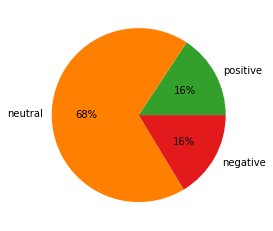

In [ ]:
data=  [
    len(df2[df2["sentiment"] =="positive" ]),
    len(df2[df2["sentiment"] =="neutral" ]),
    len(df2[df2["sentiment"] =="negative" ])
           ]

pie_chart(data)

In [ ]:
data_min=  min(
    len(df2[df2["sentiment"] =="positive" ]),
    len(df2[df2["sentiment"] =="neutral" ]),
    len(df2[df2["sentiment"] =="negative" ])

)
data_min

8322

In [ ]:
# take random samples from the data for each sample in the minimum range
sampled_positive= df2[df2['sentiment']=='positive'].sample(n=data_min)
sampled_negative= df2[df2['sentiment']=='negative'].sample(n=data_min)
sampled_neutral= df2[df2['sentiment']=='neutral'].sample(n=data_min)

In [ ]:
# this for having the labels reseted
sampled_positive=sampled_positive.reset_index(drop=True)
sampled_negative=sampled_negative.reset_index(drop=True)
sampled_neutral=sampled_neutral.reset_index(drop=True)

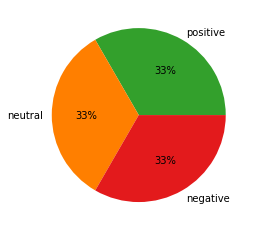

In [ ]:
data=  [
    len(sampled_positive),
    len(sampled_negative),
    len(sampled_neutral)
           ]

pie_chart(data)

In [ ]:
balanced_df2 = sampled_positive.append(sampled_neutral).append(sampled_negative).sample(frac=1).reset_index(drop=True)

In [ ]:
balanced_df2.head()

,sentiment,text
0,positive,جميلتي قوه شخصيتها تشدك للدراما من اول حلقه
1,neutral,السلام عليكم استفسر عن فلل جاهزه في المدينه وا...
2,negative,لا تخدعك ضحكتي واسلوبي الهادي انا اكثر انسان م...
3,positive,صباح الخير يا احسن شركات بالعالم متي احد فيكم ...
4,negative,والله عيب معطينا اختبرت نهاءيه صعبه وفوق ذا در...


# Modeling

In [ ]:
import pandas as pa
import numpy as np
import json
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm. notebook import tqdm
import matplotlib.pyplot as plt
import sys
import pickle
%matplotlib inline

In [ ]:
rs = 0 #randomness
np.random.seed(rs)

In [ ]:
balanced_df2_pn = balanced_df2[balanced_df2["sentiment"] != "neutral"] # we removed the neutral and kept the positive and negative to train the model on them
balanced_df2_pn["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
def random_split(data, features,output,fraction,seed=0):
  X_train,X_test,y_train,y_test = train_test_split(data[features], data[output], stratify=data[output],random_state=seed, train_size=fraction) # stratify is for having equal positive and negative
  train_data = pd.DataFrame(data=X_train,columns=features)
  train_data[output] = y_train
  test_data = pd.DataFrame(data=X_test,columns=features)
  test_data[output] = y_test
  return train_data,test_data

In [ ]:
train_fraction = .80
val_fraction = .50

output = 'sentiment'
features = balanced_df2_pn.columns.tolist()
features.remove(output)

train_data, test_data = random_split(balanced_df2_pn, features,output, train_fraction, rs) # train data will have 80% and temp is the rest which will be 20%
#val_data, test_data = random_split(temp, features, output, val_fraction, rs)
print(len(train_data))
#print(len(temp))
#print(len(val_data))
print(len(test_data))

13315
3329


In [ ]:
vectorizer =TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True, max_df=0.5stop_words=None, use_idf=True)

train_data_features = vectorizer.fit_transform(train_data['text'].values.astype('U'))
#val_data_features = vectorizer.transform(val_data['text'].values.astype('U'))
test_data_features = vectorizer.transform(test_data['text'].values.astype('U'))

NameError: ignored

In [ ]:
def train_and_test_classifier(clf, train_features, train_labels, test_features, test_labels):
  clf.fit(train_features, train_labels)
  print("score on training data:")
  print(clf.score(train_features, train_labels))
  print("_" *100)
  print("score on testing data:")
  pred_y = clf.predict(test_features)
  print('accuracy_ score')
  print(accuracy_score(test_labels, pred_y))
  print("f1_score:") # not very imp because we have balanced data, it is imp for unbalanced data
  print(f1_score(test_labels, pred_y, average = 'macro'))

In [ ]:
train_data_features.shape , test_data_features.shape
#val_data_features.shape

((13315, 165595), (3329, 165595))

In [ ]:
# using logistic regression
lr = LogisticRegression(random_state=rs)
train_and_test_classifier(lr,train_data_features, train_data[output],test_data_features,test_data[output])

score on training data:
0.9550882463387157
____________________________________________________________________________________________________
score on testing data:
accuracy_ score
0.750375488134575
f1_score:
0.7503145663938844


In [ ]:
# using naive bayes
nb = MultinomialNB()
train_and_test_classifier(nb,train_data_features, train_data[output],test_data_features,test_data[output])

score on training data:
0.9859556890724747
____________________________________________________________________________________________________
score on testing data:
accuracy_ score
0.7819164914388705
f1_score:
0.7818730126411189


In [ ]:
# using support vector machine
#svm = SVC(kernel = 'linear', probability =True ,random_state=rs)
#train_and_test_classifier(svm,train_data_features, train_data[output],val_data_features,val_data[output])

In [ ]:
# using random forest classifier
#rfc = RandomForestClassifier(n_estimators =100, random_state=rs)
#train_and_test_classifier(rfc,train_data_features, train_data[output],val_data_features,val_data[output])

In [ ]:
# going back to the unbalanced data and naming each class alone
positive_data = df2[df2['sentiment']=='positive'].dropna()
negative_data= df2[df2['sentiment']=='negative'].dropna()
neutral_data= df2[df2['sentiment']=='neutral'].dropna()
print(len(positive_data))
print(len(negative_data))
print(len(neutral_data))

8322
8645
35949


In [ ]:
# we want to seperate the data between neutral and non neautral so that we let the model learn
non_neutral_df2 = positive_data.append(negative_data).sample(frac=1).reset_index(drop =True)
non_neutral_df2['sentiment']='NonNeutral'

In [ ]:
# now we append both the neutral and non neutral data
neu_nonneau_df2 = neutral_data.append(non_neutral_df2).sample(frac=1).reset_index(drop =True)
neu_nonneau_df2

,sentiment,text
0,NonNeutral,قال الامام ابن القيم رحمه الله بركه الرجل تعلي...
1,neutral,الرءيس العراقي يحضر المءتمر في دافوس ومعه رءيس...
2,neutral,الله يعافيك انا ضاعت بطاقتي وابي اطلع بطاقه بد...
3,NonNeutral,الله لايوفق احد في كل طب لو مات عمي
4,neutral,اتمني عرضها ايضا في الكويت ضمن الموسم الثقافي ...
...,...,...
52911,NonNeutral,اي مدينه سعوديه تحبها المدينه المنوره و مسقط ر...
52912,neutral,كن متاكدا انك ستيكر في واتساب احدهم
52913,NonNeutral,ستوميه لايك و رتويت وفي الاخير م طلعت ولا جمله...
52914,NonNeutral,الشعب يستغيث من المواطن في مصر لا يجد سرير في ...


In [ ]:
train_fraction = .80
val_fraction = .50

output = 'sentiment'
features = neu_nonneau_df2.columns.tolist()
features.remove(output)

neutral_train_data, neutral_test_data = random_split(neu_nonneau_df2, features,output, train_fraction, rs) # train data will have 80% and temp is the rest which will be 20%
#neutral_val_data, neutral_test_data = random_split(neutral_temp, features, output, val_fraction, rs)
print(len(neutral_train_data))
#print(len(neutral_val_data))
print(len(neutral_test_data))
print(len(neu_nonneau_df2))

42332
10584
52916


In [ ]:
neutral_vectorizer =TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True, max_df=0.5, stop_words=None, use_idf=True)

neutral_train_data_features = neutral_vectorizer.fit_transform(neutral_train_data['text'].values.astype('U'))
#neutral_val_data_features = neutral_vectorizer.transform(neutral_val_data['text'].values.astype('U'))
neutral_test_data_features = neutral_vectorizer.transform(neutral_test_data['text'].values.astype('U'))

In [ ]:
# using logistic regression
neutral_lr = LogisticRegression(random_state=rs)
train_and_test_classifier(neutral_lr,neutral_train_data_features, neutral_train_data[output],neutral_test_data_features,neutral_test_data[output])

score on training data:
0.8705707266370595
____________________________________________________________________________________________________
score on testing data:
accuracy_ score
0.7603930461073318
f1_score:
0.6989348217858604


In [ ]:
# using naive bayes
neutral_nb = MultinomialNB()
train_and_test_classifier(neutral_nb,neutral_train_data_features, neutral_train_data[output],neutral_test_data_features,neutral_test_data[output])

score on training data:
0.8650666162713786
____________________________________________________________________________________________________
score on testing data:
accuracy_ score
0.717687074829932
f1_score:
0.5360875428039114


In [ ]:
# using support vector machine
#neutral_svm = SVC(kernel = 'linear', probability =True ,random_state=rs)
#train_and_test_classifier(neutral_svm,neutral_train_data_features, neutral_train_data[output],neutral_val_data_features,neutral_val_data[output])

In [ ]:
# using random forest classifier
#neutral_rfc = RandomForestClassifier(n_estimators =100, random_state=rs)
#train_and_test_classifier(neutral_rfc,neutral_train_data_features, neutral_train_data[output],neutral_val_data_features,neutral_val_data[output])

In [ ]:
# model_folder = '/content/drive/My_Drive/model_folder'
# sys.path.append(model_folder)

In [ ]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(lr, open('lr.pkl', 'wb'))

In [ ]:
pickle.dump(neutral_vectorizer, open('neutral_vectorizer.pkl', 'wb'))
pickle.dump(neutral_lr, open('neutral_lr.pkl', 'wb'))

In [ ]:
pn_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
lr_model = pickle.load(open('lr.pkl', 'rb'))

In [ ]:
neutral_vectorizer = pickle.load(open('neutral_vectorizer.pkl', 'rb'))
neutral_lr_model = pickle.load(open('neutral_lr.pkl', 'rb'))

In [ ]:
def predict_multi_level(X, neu_vectorizer, neu_clf, vectorizer, clf):
    neu_y_pred = neu_clf.predict(neu_vectorizer.transform(X))
    if len(X[neu_y_pred == 'NonNeutral']) > 0:
        y_pred = clf.predict(vectorizer.transform(X[neu_y_pred == 'NonNeutral'])) # classify non neutral into positive or negative
        neu_y_pred[neu_y_pred == 'NonNeutral'] = y_pred

    final_y_pred = neu_y_pred
    return final_y_pred

In [ ]:
X = df2.dropna()['text'].values
pred = predict_multi_level(X, neutral_vectorizer, neutral_lr_model, pn_vectorizer, lr_model)
#pred.shape
df2['Sentiment'] = pred

In [ ]:
print(len(df2[df2['Sentiment']=='negative']))
print(len(df2[df2['Sentiment']=='positive']))
print(len(df2[df2['Sentiment']=='neutral']))
print('-' *100)
print(len(df2[df2['sentiment']=='negative']))
print(len(df2[df2['sentiment']=='positive']))
print(len(df2[df2['sentiment']=='neutral']))

5567
6291
41058
----------------------------------------------------------------------------------------------------
8645
8322
35949


# WHATSAPP DATA


In [ ]:
X = df.dropna()['Normalized_Text'].values
pred = predict_multi_level(X, neutral_vectorizer, neutral_lr_model, pn_vectorizer, lr_model)
#pred.shape
df['Sentiment'] = pred

In [ ]:
df.head(20)

,Date,User,Message,Year,Month,Day,Hour,Minute,Second,Normalized_Text,Sentiment
0,2021-05-18 09:11:22,‪+965 9788 9035‬,قاطع؛ لأن المقاطعة مقاومة \nلا تساهم في ثمن رص...,2021,May,18,9,11,22,قاطع لان المقاطعه مقاومه لا تساهم في ثمن رصاصتهم,neutral
1,2021-05-18 10:04:48,‪+965 9971 3440‬,هادي بالاردن المنتجات البديلة\n,2021,May,18,10,4,48,هادي بالاردن المنتجات البديله,neutral
2,2021-05-18 12:31:48,‪+965 9970 5536‬,لو سمحتو. هو استاذ العربي طلب منهم يكتبو عن ال...,2021,May,18,12,31,48,لو سمحتو هو استاذ العربي طلب منهم يكتبو عن الخ...,neutral
3,2021-05-18 01:23:36,‪+965 9970 5536‬,ماحد بعرف\n,2021,May,18,1,23,36,ماحد بعرف,neutral
4,2021-05-18 01:53:49,‪+965 6042 9021‬,السلام عليكم\n,2021,May,18,1,53,49,السلام عليكم,neutral
5,2021-05-18 01:54:14,‪+965 6042 9021‬,لو سمحتو اذا بتعرفو مختبر تحاليل كويس واسعاره ...,2021,May,18,1,54,14,لو سمحتو اذا بتعرفو مختبر تحاليل كويس واسعاره ...,neutral
6,2021-05-18 04:13:49,‪+965 508 55490‬,مركز مترو السالمية\nومركز ضمان الصحي حولي\n‎,2021,May,18,4,13,49,مركز مترو السالميه ومركز ضمان الصحي حولي,neutral
7,2021-05-18 06:38:05,‪+965 9970 5536‬,شكرا عشان جاوبتو\n‎,2021,May,18,6,38,5,شكرا عشان جاوبتو,positive
8,2021-05-18 06:40:10,‪+965 9971 3440‬,عادي يا قلبي. الصبر. اه تكتبي عنهم وتقرير كم...,2021,May,18,6,40,10,عادي يا قلبي الصبر اه تكتبي عنهم وتقرير كمان ع...,negative
9,2021-05-18 06:40:52,‪+965 9971 3440‬,معلش. ممكن الناس مشغوله او مو منتبهه. او مو مر...,2021,May,18,6,40,52,معلش ممكن الناس مشغوله او مو منتبهه او مو مركز...,neutral


In [ ]:
print(len(df[df['Sentiment']=='negative']))
print(len(df[df['Sentiment']=='positive']))
print(len(df[df['Sentiment']=='neutral']))

196
169
1476


In [ ]:
def sentiment(d):
  if d['Sentiment'] == 'positive':
    return  1
  if d['Sentiment'] == 'negative':
    return -1
  if d['Sentiment'] == 'neutral':
    return 0

df['values'] = df.apply(lambda row: sentiment(row), axis=1)


In [ ]:
df.head(20)

,Date,User,Message,Year,Month,Day,Hour,Minute,Second,Normalized_Text,Sentiment,values
0,2021-05-18 09:11:22,‪+965 9788 9035‬,قاطع؛ لأن المقاطعة مقاومة \nلا تساهم في ثمن رص...,2021,May,18,9,11,22,قاطع لان المقاطعه مقاومه لا تساهم في ثمن رصاصتهم,neutral,0
1,2021-05-18 10:04:48,‪+965 9971 3440‬,هادي بالاردن المنتجات البديلة\n,2021,May,18,10,4,48,هادي بالاردن المنتجات البديله,neutral,0
2,2021-05-18 12:31:48,‪+965 9970 5536‬,لو سمحتو. هو استاذ العربي طلب منهم يكتبو عن ال...,2021,May,18,12,31,48,لو سمحتو هو استاذ العربي طلب منهم يكتبو عن الخ...,neutral,0
3,2021-05-18 01:23:36,‪+965 9970 5536‬,ماحد بعرف\n,2021,May,18,1,23,36,ماحد بعرف,neutral,0
4,2021-05-18 01:53:49,‪+965 6042 9021‬,السلام عليكم\n,2021,May,18,1,53,49,السلام عليكم,neutral,0
5,2021-05-18 01:54:14,‪+965 6042 9021‬,لو سمحتو اذا بتعرفو مختبر تحاليل كويس واسعاره ...,2021,May,18,1,54,14,لو سمحتو اذا بتعرفو مختبر تحاليل كويس واسعاره ...,neutral,0
6,2021-05-18 04:13:49,‪+965 508 55490‬,مركز مترو السالمية\nومركز ضمان الصحي حولي\n‎,2021,May,18,4,13,49,مركز مترو السالميه ومركز ضمان الصحي حولي,neutral,0
7,2021-05-18 06:38:05,‪+965 9970 5536‬,شكرا عشان جاوبتو\n‎,2021,May,18,6,38,5,شكرا عشان جاوبتو,positive,1
8,2021-05-18 06:40:10,‪+965 9971 3440‬,عادي يا قلبي. الصبر. اه تكتبي عنهم وتقرير كم...,2021,May,18,6,40,10,عادي يا قلبي الصبر اه تكتبي عنهم وتقرير كمان ع...,negative,-1
9,2021-05-18 06:40:52,‪+965 9971 3440‬,معلش. ممكن الناس مشغوله او مو منتبهه. او مو مر...,2021,May,18,6,40,52,معلش ممكن الناس مشغوله او مو منتبهه او مو مركز...,neutral,0


# WEB APP

In [ ]:
# web app was developed in the pycharm files